In [66]:
!pip install glob2

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import glob2
import PIL
from tqdm import tqdm
import cv2
import numpy as np
import shutil

In [4]:
try:
    import Image
except ImportError:
    from PIL import Image

In [5]:
x = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12]])

In [6]:
y = np.array([[3, 4], 
              [9, 10]])

In [7]:
x[0:2,  2:4] = y

In [8]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  9, 10],
       [ 9, 10, 11, 12]])

In [9]:
image = PIL.Image.open("./svt/svt1/img/14_03.jpg")
width, height = image.size

print(width, height)

1280 880


In [10]:
img = np.zeros((1280, 880))

In [11]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

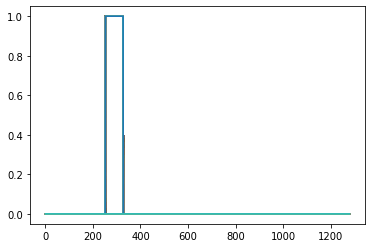

In [12]:
img[253:328,  375:611] = 1
plt.plot(img)
plt.show()

In [13]:
img[272:349,  639:815] = 1

In [14]:
img[283:371,  839:1121] = 1

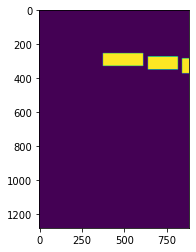

In [15]:
plt.imshow(img)
plt.show()

In [16]:
dataset = pd.read_csv('./train.csv')  #load the dataset
dataset

,imageName,tags,labels
0,img/14_03.jpg,LIVING,"{'height': '75', 'width': '236', 'x': '375', '..."
1,img/14_03.jpg,ROOM,"{'height': '76', 'width': '175', 'x': '639', '..."
2,img/14_03.jpg,THEATERS,"{'height': '87', 'width': '281', 'x': '839', '..."
3,img/14_04.jpg,INSURANCE,"{'height': '64', 'width': '366', 'x': '571', '..."
4,img/14_04.jpg,STANDARD,"{'height': '84', 'width': '354', 'x': '180', '..."
...,...,...,...
252,img/11_11.jpg,CENTER,"{'height': '41', 'width': '95', 'x': '722', 'y..."
253,img/11_11.jpg,PERFORMING,"{'height': '36', 'width': '131', 'x': '528', '..."
254,img/11_11.jpg,ORLANDO,"{'height': '23', 'width': '67', 'x': '521', 'y..."
255,img/04_16.jpg,BLOCKBUSTER,"{'height': '61', 'width': '281', 'x': '467', '..."


In [17]:
listededico = dataset['labels'].tolist()  #store the labels column to a list
listededico

["{'height': '75', 'width': '236', 'x': '375', 'y': '253'}",
 "{'height': '76', 'width': '175', 'x': '639', 'y': '272'}",
 "{'height': '87', 'width': '281', 'x': '839', 'y': '283'}",
 "{'height': '64', 'width': '366', 'x': '571', 'y': '344'}",
 "{'height': '84', 'width': '354', 'x': '180', 'y': '310'}",
 "{'height': '64', 'width': '229', 'x': '973', 'y': '359'}",
 "{'height': '64', 'width': '171', 'x': '756', 'y': '410'}",
 "{'height': '54', 'width': '113', 'x': '591', 'y': '416'}",
 "{'height': '50', 'width': '116', 'x': '927', 'y': '420'}",
 "{'height': '35', 'width': '87', 'x': '1000', 'y': '551'}",
 "{'height': '159', 'width': '673', 'x': '176', 'y': '292'}",
 "{'height': '61', 'width': '407', 'x': '482', 'y': '501'}",
 "{'height': '98', 'width': '731', 'x': '177', 'y': '354'}",
 "{'height': '55', 'width': '175', 'x': '506', 'y': '494'}",
 "{'height': '50', 'width': '120', 'x': '680', 'y': '492'}",
 "{'height': '27', 'width': '71', 'x': '1032', 'y': '622'}",
 "{'height': '55', 'wid

In [124]:
alpha = ast.literal_eval(listededico[0]) #convert stringdico to realdico
alpha

{'height': '75', 'width': '236', 'x': '375', 'y': '253'}

In [19]:
int(alpha['height'])

75

In [20]:
len(listededico)

257

In [21]:
realdico = []
height = []
width = []
exes = []
wayy = []

for i in range(len(listededico)):
    alpha = ast.literal_eval(listededico[i])  #convert a string of dico to a real dico
    
    realdico.append(alpha)

for i in range(257):
    height.append(int(realdico[i]['height']))    
    
for i in range(257):
    width.append(int(realdico[i]['width'])) 
    
for i in range(257):
    exes.append(int(realdico[i]['x']))
    
for i in range(257):
    wayy.append(int(realdico[i]['y']))
    
exes1 = exes
wayy1 = wayy

exes2 = [x + y for x, y in zip(exes, width)]  #add up both lists

wayy2 = [a + b for a, b in zip(wayy, height)]  #add up both lists

In [22]:
len(wayy2)

257

In [23]:
dataset['x1'] = exes1
dataset['y1'] = wayy1
dataset['x2'] = exes2
dataset['y2'] = wayy2

In [24]:
dataset

,imageName,tags,labels,x1,y1,x2,y2
0,img/14_03.jpg,LIVING,"{'height': '75', 'width': '236', 'x': '375', '...",375,253,611,328
1,img/14_03.jpg,ROOM,"{'height': '76', 'width': '175', 'x': '639', '...",639,272,814,348
2,img/14_03.jpg,THEATERS,"{'height': '87', 'width': '281', 'x': '839', '...",839,283,1120,370
3,img/14_04.jpg,INSURANCE,"{'height': '64', 'width': '366', 'x': '571', '...",571,344,937,408
4,img/14_04.jpg,STANDARD,"{'height': '84', 'width': '354', 'x': '180', '...",180,310,534,394
...,...,...,...,...,...,...,...
252,img/11_11.jpg,CENTER,"{'height': '41', 'width': '95', 'x': '722', 'y...",722,332,817,373
253,img/11_11.jpg,PERFORMING,"{'height': '36', 'width': '131', 'x': '528', '...",528,331,659,367
254,img/11_11.jpg,ORLANDO,"{'height': '23', 'width': '67', 'x': '521', 'y...",521,391,588,414
255,img/04_16.jpg,BLOCKBUSTER,"{'height': '61', 'width': '281', 'x': '467', '...",467,497,748,558


In [112]:
ls

svt/  svt.zip  train.csv  Untitled.ipynb


In [25]:
lesimages = dataset['imageName'].tolist()
len(lesimages)

257

In [26]:
liens = ["./svt/svt1/"]*257

In [27]:
liens[1] + lesimages[1]

'./svt/svt1/img/14_03.jpg'

In [28]:
#liens  
#lesimages
jointure = []
for i in range(257):
    
    joint = liens[i] + lesimages[i]
    
    jointure.append(joint)
#jointure

In [29]:
jointure

['./svt/svt1/img/14_03.jpg',
 './svt/svt1/img/14_03.jpg',
 './svt/svt1/img/14_03.jpg',
 './svt/svt1/img/14_04.jpg',
 './svt/svt1/img/14_04.jpg',
 './svt/svt1/img/14_04.jpg',
 './svt/svt1/img/06_08.jpg',
 './svt/svt1/img/06_08.jpg',
 './svt/svt1/img/06_08.jpg',
 './svt/svt1/img/06_08.jpg',
 './svt/svt1/img/00_12.jpg',
 './svt/svt1/img/15_15.jpg',
 './svt/svt1/img/15_15.jpg',
 './svt/svt1/img/04_04.jpg',
 './svt/svt1/img/04_04.jpg',
 './svt/svt1/img/04_04.jpg',
 './svt/svt1/img/12_07.jpg',
 './svt/svt1/img/12_07.jpg',
 './svt/svt1/img/06_11.jpg',
 './svt/svt1/img/06_11.jpg',
 './svt/svt1/img/08_16.jpg',
 './svt/svt1/img/05_12.jpg',
 './svt/svt1/img/05_12.jpg',
 './svt/svt1/img/00_08.jpg',
 './svt/svt1/img/00_08.jpg',
 './svt/svt1/img/00_08.jpg',
 './svt/svt1/img/00_08.jpg',
 './svt/svt1/img/00_01.jpg',
 './svt/svt1/img/00_01.jpg',
 './svt/svt1/img/00_01.jpg',
 './svt/svt1/img/00_01.jpg',
 './svt/svt1/img/00_01.jpg',
 './svt/svt1/img/01_10.jpg',
 './svt/svt1/img/01_10.jpg',
 './svt/svt1/i

In [30]:
imagewidthhh = []
imageheighttt = []

for thing in jointure:
    image = PIL.Image.open(thing)
    width, height = image.size

    imagewidthhh.append(image.size[0])
    imageheighttt.append(image.size[1])
    

In [31]:
len(imagewidthhh)

257

In [32]:
dataset['joint'] = jointure
dataset['imagewidth'] = imagewidthhh
dataset['imageheight'] = imageheighttt

In [33]:
dataset

,imageName,tags,labels,x1,y1,x2,y2,joint,imagewidth,imageheight
0,img/14_03.jpg,LIVING,"{'height': '75', 'width': '236', 'x': '375', '...",375,253,611,328,./svt/svt1/img/14_03.jpg,1280,880
1,img/14_03.jpg,ROOM,"{'height': '76', 'width': '175', 'x': '639', '...",639,272,814,348,./svt/svt1/img/14_03.jpg,1280,880
2,img/14_03.jpg,THEATERS,"{'height': '87', 'width': '281', 'x': '839', '...",839,283,1120,370,./svt/svt1/img/14_03.jpg,1280,880
3,img/14_04.jpg,INSURANCE,"{'height': '64', 'width': '366', 'x': '571', '...",571,344,937,408,./svt/svt1/img/14_04.jpg,1276,884
4,img/14_04.jpg,STANDARD,"{'height': '84', 'width': '354', 'x': '180', '...",180,310,534,394,./svt/svt1/img/14_04.jpg,1276,884
...,...,...,...,...,...,...,...,...,...,...
252,img/11_11.jpg,CENTER,"{'height': '41', 'width': '95', 'x': '722', 'y...",722,332,817,373,./svt/svt1/img/11_11.jpg,1280,800
253,img/11_11.jpg,PERFORMING,"{'height': '36', 'width': '131', 'x': '528', '...",528,331,659,367,./svt/svt1/img/11_11.jpg,1280,800
254,img/11_11.jpg,ORLANDO,"{'height': '23', 'width': '67', 'x': '521', 'y...",521,391,588,414,./svt/svt1/img/11_11.jpg,1280,800
255,img/04_16.jpg,BLOCKBUSTER,"{'height': '61', 'width': '281', 'x': '467', '...",467,497,748,558,./svt/svt1/img/04_16.jpg,1280,1024


In [60]:
ls

100images/  svt/  svt.zip  train.csv  Untitled.ipynb


In [122]:
images = "./images"

In [109]:
les_noms = dataset['imageName'].unique().tolist()

100

In [125]:
len(listededico)

257

In [123]:
def data_for_scoremap(csv)

dataset = pd.read_csv(csv)  #load the dataset
listededico = dataset['labels'].tolist()  #store the labels column to a list

realdico = []
height = []
width = []
exes = []
wayy = []

for i in range(len(listededico)):
    alpha = ast.literal_eval(listededico[i])  #convert a string of dico to a real dico
    
    realdico.append(alpha)

for i in range(len(listededico)):
    height.append(int(realdico[i]['height']))    
    
for i in range(len(listededico)):
    width.append(int(realdico[i]['width'])) 
    
for i in range(len(listededico)):
    exes.append(int(realdico[i]['x']))
    
for i in range(len(listededico)):
    wayy.append(int(realdico[i]['y']))
    
exes1 = exes
wayy1 = wayy

exes2 = [x + y for x, y in zip(exes, width)]  #add up both lists

wayy2 = [a + b for a, b in zip(wayy, height)]  #add up both lists

dataset['x1'] = exes1
dataset['y1'] = wayy1
dataset['x2'] = exes2
dataset['y2'] = wayy2


lesimages = dataset['imageName'].tolist()

liens = ["./svt/svt1/"]*len(lesimages)

jointure = []
for i in range(len(lesimages)):
    
    joint = liens[i] + lesimages[i]
    
    jointure.append(joint)

imagewidthhh = []
imageheighttt = []

for thing in jointure:
    image = PIL.Image.open(thing)
    width, height = image.size

    imagewidthhh.append(image.size[0])
    imageheighttt.append(image.size[1])

dataset['joint'] = jointure
dataset['imagewidth'] = imagewidthhh
dataset['imageheight'] = imageheighttt

les_noms = dataset['imageName'].unique().tolist()

for noms in tqdm(les_noms):
    #firstimage = (dataset['imageName'] == noms)
    groupe_of_first_image = dataset[dataset['imageName'] == noms]
    groupe = groupe_of_first_image.reset_index(drop=True)
    
    matrix = (np.zeros(((groupe.iloc[0, 9]), (groupe.iloc[0, 8]))))
    for i in range(len(groupe)):

        #matrix = (np.zeros(((groupe.iloc[i, 9]), (groupe.iloc[i, 8]))))

        block = (np.zeros(((groupe.iloc[i, 9]), (groupe.iloc[i, 8]))))

        #block = (np.ones(((groupe.iloc[i, 6]) - (groupe.iloc[i, 4])), ((groupe.iloc[i, 5]) - (groupe.iloc[i, 3]))))

        block[(groupe.iloc[i, 4]):(groupe.iloc[i, 6]), (groupe.iloc[i, 3]):(groupe.iloc[i, 5])] = 1

        matrix = np.add(matrix, block) #matrix + block

    #plt.imshow(matrix)
    #plt.show()
    img = Image.fromarray(matrix)
    img = img.convert('RGB')
    img.save(f'{images}/{noms}')
    
    
    
    

100%|██████████| 100/100 [00:12<00:00,  8.29it/s]


In [34]:
firstimage = dataset['imageName'] == 'img/14_04.jpg'
firstimage

0      False
1      False
2      False
3       True
4       True
       ...  
252    False
253    False
254    False
255    False
256    False
Name: imageName, Length: 257, dtype: bool

In [35]:
groupeoffirstimage = dataset[firstimage]

In [36]:
groupe = groupeoffirstimage.reset_index(drop=True)

In [37]:
groupe

,imageName,tags,labels,x1,y1,x2,y2,joint,imagewidth,imageheight
0,img/14_04.jpg,INSURANCE,"{'height': '64', 'width': '366', 'x': '571', '...",571,344,937,408,./svt/svt1/img/14_04.jpg,1276,884
1,img/14_04.jpg,STANDARD,"{'height': '84', 'width': '354', 'x': '180', '...",180,310,534,394,./svt/svt1/img/14_04.jpg,1276,884
2,img/14_04.jpg,CENTER,"{'height': '64', 'width': '229', 'x': '973', '...",973,359,1202,423,./svt/svt1/img/14_04.jpg,1276,884


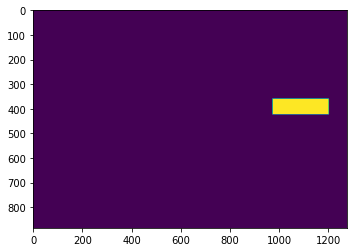

In [43]:
flop = np.zeros((884, 1276))
flop[359:423, 973:1202] = 1
#flop[310:394, 180:534] = 1
plt.imshow(flop)
plt.show()


In [40]:
flop.shape

(1276, 884)

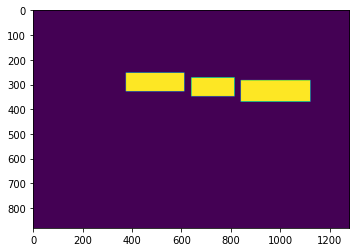

In [98]:
matrix = (np.zeros(((groupe.iloc[0, 9]), (groupe.iloc[0, 8]))))
for i in range(len(groupe)):
     
    #matrix = (np.zeros(((groupe.iloc[i, 9]), (groupe.iloc[i, 8]))))
    
    block = (np.zeros(((groupe.iloc[i, 9]), (groupe.iloc[i, 8]))))
    
    #block = (np.ones(((groupe.iloc[i, 6]) - (groupe.iloc[i, 4])), ((groupe.iloc[i, 5]) - (groupe.iloc[i, 3]))))
    
    block[(groupe.iloc[i, 4]):(groupe.iloc[i, 6]), (groupe.iloc[i, 3]):(groupe.iloc[i, 5])] = 1
    
    matrix = np.add(matrix, block) #matrix + block
    
plt.imshow(matrix)
plt.show()


img = Image.fromarray(matrix)
img = img.convert('RGB')
img.save('./first.png')
    

(880, 1280, 3)

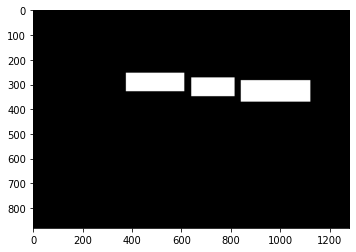

In [99]:

im = plt.imread('./first.png')
im = im*255
plt.imshow(im)
im.shape

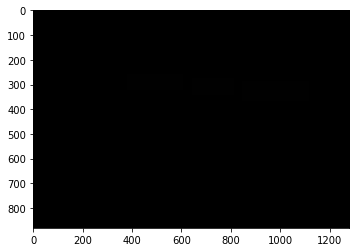

In [90]:
image = cv2.imread('./first.png')
plt.imshow(image)

In [94]:
maaatrix = np.unique(matrix)
maaatrix

array([0., 1.])

In [39]:
np.zeros((1276, 884))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Do an overlay for each true image